# Retail Sales Data Analysis & Insights Using Python


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [9]:

files = [file for file in os.listdir() if file.endswith('.csv')] 

df = pd.DataFrame()

for file in files:
    df2 = pd.read_csv(file)
    df= pd.concat([df, df2])
    
df.to_csv("allmonthssales", index=False)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


#### Reading updated csv file

In [11]:
df = pd.read_csv("allmonthssales")

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Clean up the data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [15]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

### Dropping null values

In [17]:
df = df.dropna()

In [18]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### removing unnecessary spaces if any from column name

In [20]:
df.columns=df.columns.str.strip()##removes unnecessary spaces from column name

In [21]:
indexes = df[df["Order Date"] == "Order Date"].index
print(indexes)

Index([   254,    705,   1101,   2875,   3708,   3793,   3812,   4218,   5143,
         5293,
       ...
       179246, 180955, 181479, 182134, 182146, 183671, 184012, 184041, 184275,
       186532],
      dtype='int64', length=355)


#### dropping row where order date = order date and resetting the index

In [23]:

df.drop(index=indexes,inplace =True)
df.reset_index(drop =True,inplace=True)


##### Converting columns to Correct Type

In [25]:
df["Quantity Ordered"]=pd.to_numeric(df["Quantity Ordered"])#make int
df["Price Each"]=pd.to_numeric(df["Price Each"])#make float


In [26]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

/var/folders/d5/m856t4gd4vq7r_gyzw2htq4m0000gn/T/ipykernel_3613/13081262.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Order Date"] = pd.to_datetime(df["Order Date"])


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 8.5+ MB


#### Augment Data with additional columns

#### Task2: Add Month Coloumn

In [30]:
df["Month"]=df["Order Date"].dt.month_name()



#### Task3:Adding Sales Column

In [32]:
df["Sales"]=df["Quantity Ordered"]*df["Price Each"]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,11.95
...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",June,2.99
185946,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",June,149.99
185947,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",June,11.95
185948,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",June,11.95


#### Task 4 : Adding city Column

#### Adding city column

In [35]:
def get_city(address):
    return address.split(",")[1].strip()  # Extract the second part and remove extra spaces
def get_state(address):
    return address.split(",")[2].split(" ")[1]
df["City"] = df["Purchase Address"].apply(lambda x:f"{get_city(x)}({get_state(x)})")


In [36]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,1700.00,New York City(NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,600.00,New York City(NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,11.95,New York City(NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,149.99,San Francisco(CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,11.95,Atlanta(GA)
...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",June,2.99,Boston(MA)
185946,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",June,149.99,New York City(NY)
185947,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",June,11.95,San Francisco(CA)
185948,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",June,11.95,San Francisco(CA)


#### Question 1 : What was the best month for sales and how much was earned that month

In [38]:
df["Month"] = pd.Categorical(df["Month"], categories=[
    "January", "February", "March", "April","May","June",
    "July", "August", "September", "October", "November", "December"
], ordered=True)

df.groupby("Month")["Sales"].sum().sort_index()

/var/folders/d5/m856t4gd4vq7r_gyzw2htq4m0000gn/T/ipykernel_3613/3736853097.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Month")["Sales"].sum().sort_index()


Month
January      1822256.73
February     2202022.42
March        2807100.38
April        3390670.24
May          3152606.75
June         2577802.26
July         2647775.76
August       2244467.88
September    2097560.13
October      3736726.88
November     3199603.20
December     4613443.34
Name: Sales, dtype: float64

/var/folders/d5/m856t4gd4vq7r_gyzw2htq4m0000gn/T/ipykernel_3613/1877402683.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Month")["Sales"].sum().sort_index().plot(kind = "bar",title ="Sales by Month",xlabel ="Month",ylabel = "Sales")


<Axes: title={'center': 'Sales by Month'}, xlabel='Month', ylabel='Sales'>

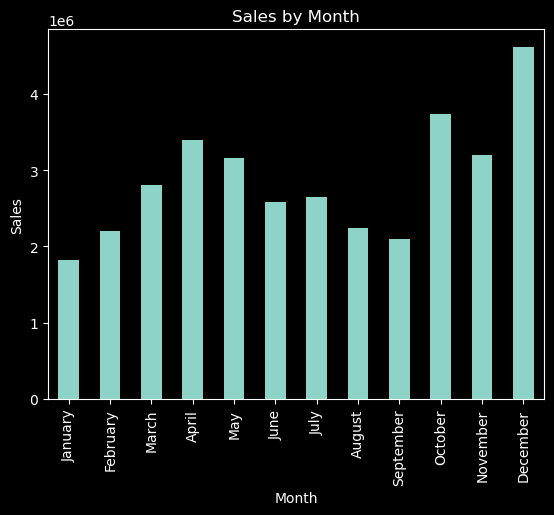

In [66]:
df["Month"] = pd.Categorical(df["Month"], categories=[
    "January", "February", "March", "April","May","June",
    "July", "August", "September", "October", "November", "December"
], ordered=True)
df.groupby("Month")["Sales"].sum().sort_index().plot(kind = "bar",title ="Sales by Month",xlabel ="Month",ylabel = "Sales")

#### Question 3: Which season has highes sales?

#### Question 3: Which season has highes sales

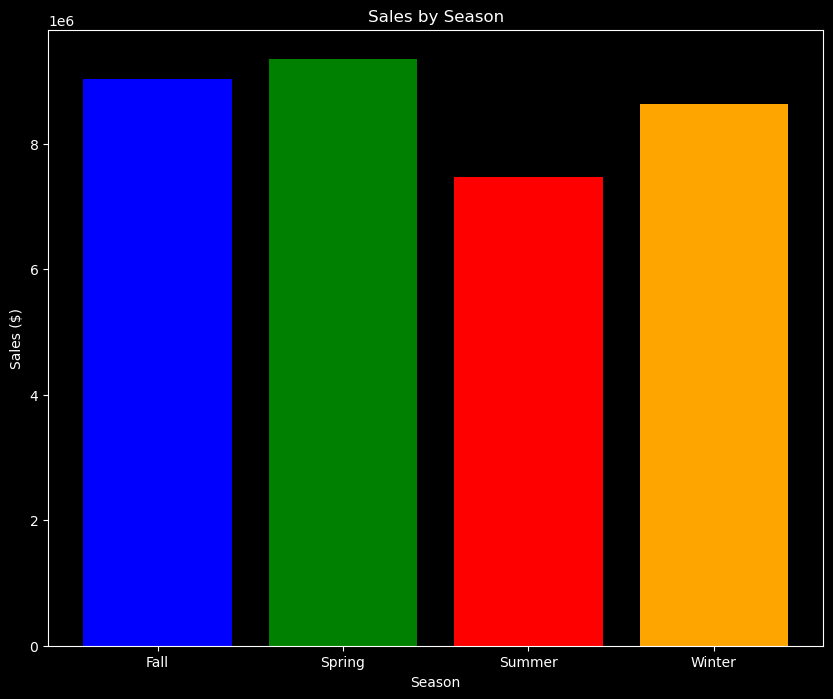

In [84]:
# Define a mapping of month names to seasons
def get_season(month):
    season_map = {
        "December": "Winter", "January": "Winter", "February": "Winter",
        "March": "Spring", "April": "Spring", "May": "Spring",
        "June": "Summer", "July": "Summer", "August": "Summer",
        "September": "Fall", "October": "Fall", "November": "Fall"
    }
    return season_map.get(month, "Unknown")  # Default to "Unknown" if month not found

# Apply the function to create a new column
df["Season"] = df["Month"].apply(get_season)
df["Sales"] = pd.to_numeric(df["Sales"], errors="coerce")

# Group by season and sum sales
season_sales = df.groupby("Season")["Sales"].sum()

# Plot the sales data by season
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.bar(season_sales.index, season_sales.values, color=['blue', 'green', 'red', 'orange'])
plt.ylabel("Sales ($)")
plt.xlabel("Season")
plt.title("Sales by Season")
plt.show()




##### Question 2: Which city has highest number of sales

In [42]:
df.groupby("City")["Sales"].sum().sort_values()

City
Portland(ME)          449758.27
Austin(TX)           1819581.75
Portland(OR)         1870732.34
Seattle(WA)          2747755.48
Dallas(TX)           2767975.40
Atlanta(GA)          2795498.58
Boston(MA)           3661642.01
New York City(NY)    4664317.43
Los Angeles(CA)      5452570.80
San Francisco(CA)    8262203.91
Name: Sales, dtype: float64

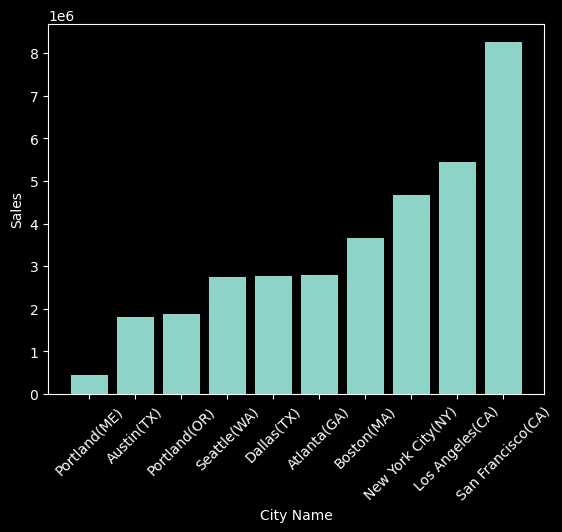

In [64]:
#using matplotlib
x =df.groupby("City")["Sales"].sum().sort_values()
plt.bar(x.index,x.values)
plt.xticks(rotation =45)
plt.xlabel("City Name")
plt.ylabel("Sales")
plt.style.use("dark_background")
plt.show()

#### What time should we display advertisements to maximize likelihood of customer's buying product?

([<matplotlib.axis.XTick at 0x178655580>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

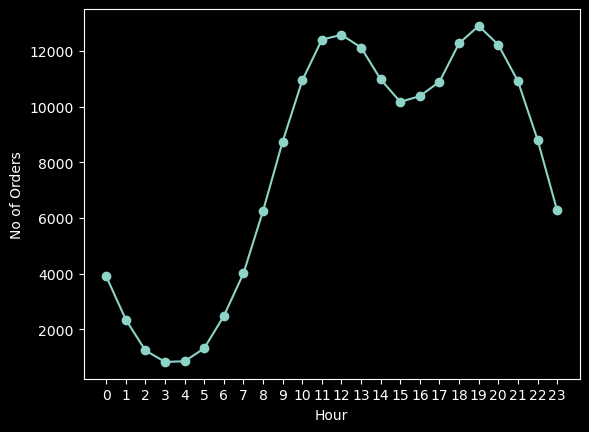

In [47]:
df["Hour"]=df["Order Date"].dt.hour
x =df.groupby("Hour").count()["Product"]
plt.plot(x.index,x.values,marker = "o")
plt.xlabel("Hour")
plt.ylabel("No of Orders")
plt.xticks(x.index)

#### Question 4: What Products are most ofenly sold together

In [50]:
df2=df[df["Order ID"].duplicated(keep =False)]
df2["Grouped_Orders"]=df2.groupby("Order ID")["Product"].transform(lambda x:",".join(x))
df2=df2[["Order ID","Grouped_Orders"]].drop_duplicates()
df2.head(10)

/var/folders/d5/m856t4gd4vq7r_gyzw2htq4m0000gn/T/ipykernel_3613/827904866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Grouped_Orders"]=df2.groupby("Order ID")["Product"].transform(lambda x:",".join(x))


,Order ID,Grouped_Orders
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
80,295737,"iPhone,Lightning Charging Cable"
97,295753,"34in Ultrawide Monitor,Lightning Charging Cable"
104,295759,"Bose SoundSport Headphones,Wired Headphones"
129,295783,"Vareebadd Phone,USB-C Charging Cable"
133,295786,"USB-C Charging Cable,Apple Airpods Headphones"


In [52]:
from itertools import combinations
from collections import Counter

# Creating a list of all product combinations from Grouped_Orders
product_combinations = []

for orders in df2["Grouped_Orders"]:
    products = orders.split(",")
    if len(products) > 1:
        product_combinations.extend(combinations(products, 2))  # Get all pairwise combinations

# Count the frequency of each product pair
combination_counts = Counter(product_combinations)

# Display the top 10 most common product pairs
print(combination_counts.most_common(10))


[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('iPhone', 'Apple Airpods Headphones'), 360), (('Google Phone', 'Bose SoundSport Headphones'), 220), (('USB-C Charging Cable', 'Wired Headphones'), 160), (('Vareebadd Phone', 'Wired Headphones'), 143), (('Lightning Charging Cable', 'Wired Headphones'), 92)]


#### Question 5: What product sold the most and why?

In [55]:
x= df.groupby("Product")["Quantity Ordered"].sum()
x

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [57]:
y = df.groupby("Product")["Price Each"].mean()

/var/folders/d5/m856t4gd4vq7r_gyzw2htq4m0000gn/T/ipykernel_3613/1876587075.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x.index,rotation="vertical",size=8)


<Figure size 1300x500 with 0 Axes>

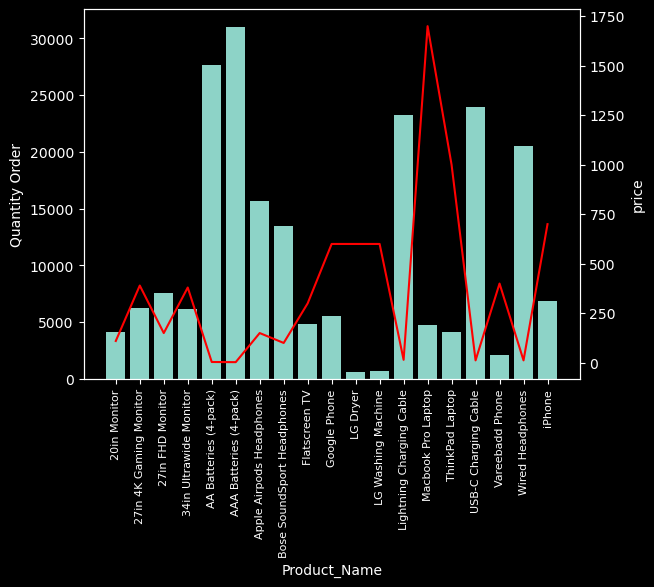

In [59]:
plt.figure(figsize=(13,5))
fig,ax = plt.subplots()
ax1=ax.twinx()
ax.bar(x.index,x.values)
ax1.plot(x.index,y.values,color ="Red")


ax.set_xlabel("Product_Name")
ax.set_ylabel("Quantity Order")
ax1.set_ylabel("price")
ax.set_xticklabels(x.index,rotation="vertical",size=8)
plt.show()